In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from statsmodels.tsa.stattools import adfuller, grangercausalitytests, kpss
import os
import time
%matplotlib inline

In [2]:
plt.style.use('default') 
plt.rc('font',  size=9) 
plt.rc('figure', figsize=(4,3), dpi=150) 

In [133]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Washington DC': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [3]:
df = pd.read_csv('states_unstacked.csv')
print(len(df))
df.rename(columns={'Unnamed: 0': 'statefips'}, inplace=True)
df = df[df.date <= '2021-02-25']

20145


In [219]:
df.tail()

,statefips,date,Stringency,positiveIncrease,deathIncrease,hospitalizedIncrease,totalTestsPeopleViralIncrease
20136,56,2021-02-21,58.33,112.0,0.0,2.0,0.0
20137,56,2021-02-22,61.11,105.0,0.0,3.0,946.0
20138,56,2021-02-23,61.11,44.0,9.0,1.0,0.0
20139,56,2021-02-24,61.11,44.0,0.0,1.0,852.0
20140,56,2021-02-25,61.11,214.0,0.0,3.0,364.0


In [4]:
sdi = pd.read_csv('mobility_pca_only.csv', index_col=0)
sdi.rename(columns={'Date':'date'}, inplace=True)
sdi.tail()

,statefips,statename,date,shadow_index_normalized
19936,51,Virginia,2021-02-25,54.487582
19937,53,Washington,2021-02-25,33.655507
19938,54,West Virginia,2021-02-25,40.557192
19939,55,Wisconsin,2021-02-25,46.619273
19940,56,Wyoming,2021-02-25,42.436364


In [13]:
corr_stringency_positiveincrease = []
for state in df.statefips.unique():
    sub_df = df[df['statefips'] == state]
    corr_stringency_positiveincrease.append(pearsonr(sub_df.Stringency.values[:-7], sub_df.positiveIncrease.values[7:])[0])

Text(0, 0.5, '# states')

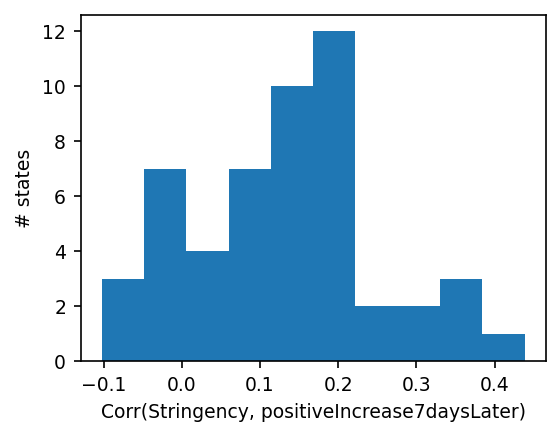

In [17]:
plt.hist(corr_stringency_positiveincrease)
plt.xlabel('Corr(Stringency, positiveIncrease7daysLater)')
plt.ylabel('# states')

In [18]:
corr_stringency_deathincrease = []
for state in df.statefips.unique():
    sub_df = df[df['statefips'] == state]
    corr_stringency_deathincrease.append(pearsonr(sub_df.Stringency.values[:-7], sub_df.deathIncrease.values[7:])[0])
    
    

Text(0, 0.5, '# states')

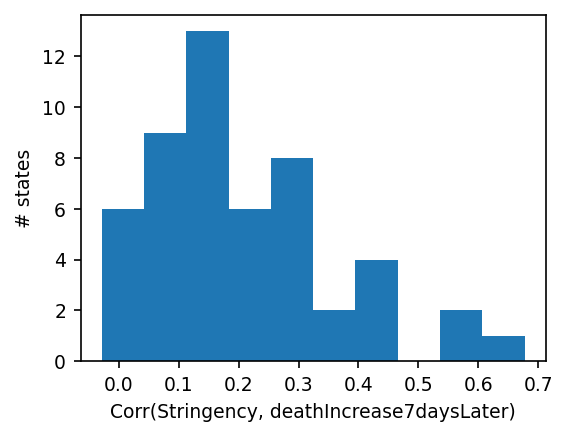

In [19]:
plt.hist(corr_stringency_deathincrease)
plt.xlabel('Corr(Stringency, deathIncrease7daysLater)')
plt.ylabel('# states')

In [20]:
corr_stringency_hospitalizedincrease = []
for state in df.statefips.unique():
    sub_df = df[df['statefips'] == state]
    corr_stringency_hospitalizedincrease.append(pearsonr(sub_df.Stringency.values[:-7], sub_df.hospitalizedIncrease.values[7:])[0])
    
    

//anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
//anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
//anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
//anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
//anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correla

Text(0, 0.5, '# states')

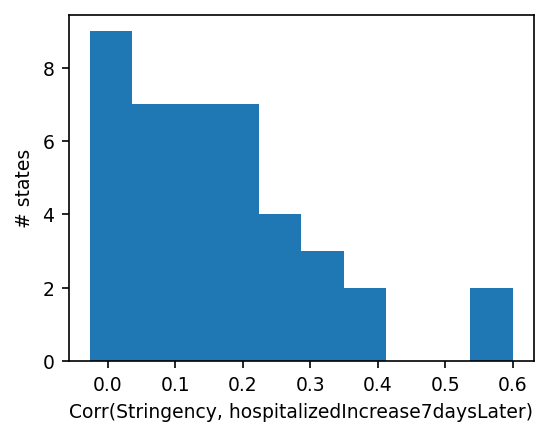

In [21]:
plt.hist(corr_stringency_hospitalizedincrease)
plt.xlabel('Corr(Stringency, hospitalizedIncrease7daysLater)')
plt.ylabel('# states')

## Merge SDI and all other stats

In [24]:
state = 6  # CA
df_CA = df[(df.statefips==state)]
sdi_CA = sdi[sdi.statefips==state]
print(df_CA.tail())
print(sdi_CA.tail())
print(len(df_CA))
print(len(sdi_CA))

      statefips        date  Stringency  positiveIncrease  deathIncrease  \
1966          6  2021-02-21       61.57            6760.0          280.0   
1967          6  2021-02-22       61.57            4665.0          233.0   
1968          6  2021-02-23       61.57            3447.0          225.0   
1969          6  2021-02-24       61.57            5303.0          314.0   
1970          6  2021-02-25       61.57            4965.0         1114.0   

      hospitalizedIncrease  totalTestsPeopleViralIncrease  
1966                   0.0                            0.0  
1967                   0.0                            0.0  
1968                   0.0                            0.0  
1969                   0.0                            0.0  
1970                   0.0                            0.0  
       statefips   statename        date  shadow_index_normalized
19690          6  California  2021-02-21                52.866823
19741          6  California  2021-02-22           

In [63]:
ts_positiveIncrease = df_CA['positiveIncrease']
ts_deathIncrease = df_CA['deathIncrease']
ts_hospitalizedIncrease = df_CA['hospitalizedIncrease']
ts_sdi = sdi_CA['shadow_index_normalized']
ts_stringency = df_CA['Stringency']

In [64]:
def augmented_dickey_fuller_statistics(time_series):
    result = adfuller(time_series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [65]:
augmented_dickey_fuller_statistics(ts_positiveIncrease.diff().dropna())
augmented_dickey_fuller_statistics(ts_deathIncrease.diff().dropna())
#augmented_dickey_fuller_statistics(ts_hospitalizedIncrease.diff().dropna())
augmented_dickey_fuller_statistics(ts_sdi.diff().dropna())
augmented_dickey_fuller_statistics(ts_stringency)

ADF Statistic: -3.528809
p-value: 0.007277
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571
ADF Statistic: -3.665422
p-value: 0.004627
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571
ADF Statistic: -5.034433
p-value: 0.000019
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571
ADF Statistic: -3.655449
p-value: 0.004785
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


<AxesSubplot:>

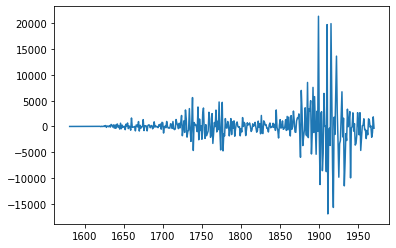

In [66]:
ts_positiveIncrease.diff().dropna().plot()

<AxesSubplot:>

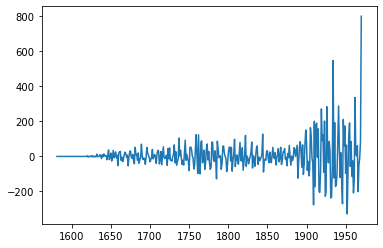

In [67]:
ts_deathIncrease.diff().dropna().plot()

<AxesSubplot:>

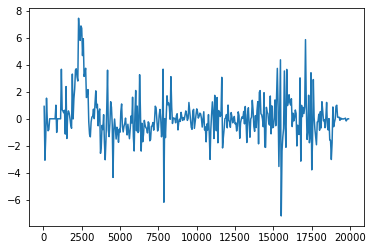

In [68]:
ts_sdi.diff().dropna().plot()

<AxesSubplot:>

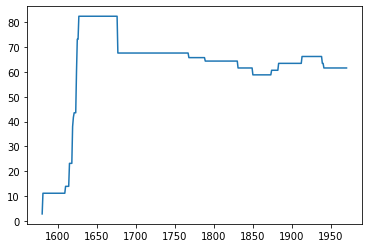

In [69]:
ts_stringency.plot()

In [70]:
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [71]:
kpss_test(ts_positiveIncrease.diff().dropna())
kpss_test(ts_deathIncrease.diff().dropna())
#augmented_dickey_fuller_statistics(ts_hospitalizedIncrease.diff().dropna())
kpss_test(ts_sdi.diff().dropna())
kpss_test(ts_stringency)

KPSS Statistic: 0.10007581897234967
p-value: 0.1
num lags: 17
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.244588231597027
p-value: 0.1
num lags: 17
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.2106002277161973
p-value: 0.1
num lags: 17
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.3148304484861136
p-value: 0.1
num lags: 17
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater t

In [89]:
maxlag=14
test = 'ssr-chi2test'
def grangers_causality_matrix(X_train, variables, test = 'ssr_chi2test', verbose=False):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(X_train[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value
    dataset.columns = [var + '_x' for var in variables]
    dataset.index = [var + '_y' for var in variables]
    return dataset

In [82]:
tmp = np.vstack((ts_stringency.values[1:], ts_sdi.diff().dropna().values, ts_positiveIncrease.diff().dropna().values, ts_deathIncrease.diff().dropna().values)).T



In [86]:
df_var = pd.DataFrame(tmp, columns=['Stringency', 'SDI', 'Positive', 'Death'])

In [87]:
df_var

,Stringency,SDI,Positive,Death
0,11.11,0.922593,0.0,0.0
1,11.11,-3.071594,0.0,0.0
2,11.11,-1.356729,0.0,0.0
3,11.11,1.529245,0.0,0.0
4,11.11,-0.117097,0.0,0.0
...,...,...,...,...
385,61.57,0.048992,92.0,-201.0
386,61.57,-0.158885,-2095.0,-47.0
387,61.57,-0.063153,-1218.0,-8.0
388,61.57,0.000000,1856.0,89.0


In [90]:
grangers_causality_matrix(df_var, variables = df_var.columns)

//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 3
  'rank is %d' % (J, J_), ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)


,Stringency_x,SDI_x,Positive_x,Death_x
Stringency_y,1.0000,0.0004,0.7255,0.8520
SDI_y,0.0000,1.0000,0.0143,0.2929
Positive_y,0.9310,0.0567,1.0000,0.0000
Death_y,0.9246,0.0052,0.0000,1.0000


In [91]:
from statsmodels.tsa.api import VAR

In [92]:
mod = VAR(df_var)
res = mod.fit(maxlags=14, ic='aic')
print(res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 03, Mar, 2021
Time:                     11:36:25
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    27.7927
Nobs:                     378.000    HQIC:                   26.5622
Log likelihood:          -6816.64    FPE:                1.53697e+11
AIC:                      25.7524    Det(Omega_mle):     9.43890e+10
--------------------------------------------------------------------
Results for equation Stringency
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  1.235923         0.355012            3.481           0.000
L1.Stringency          1.148972         0.054851           20.947           0.000
L1.SDI                 0.030220         0.070593   

## Granger causality

## Regression

In [5]:
import statsmodels.api as sm
from datetime import datetime, timedelta

### Read data

In [31]:
df = pd.read_csv('states_unstacked.csv')
df.rename(columns={'Unnamed: 0': 'statefips'}, inplace=True)
df = df[(df.date <= '2021-02-25') & (df.date >= '2020-03-07')]

In [32]:
df.tail()

,statefips,date,Stringency,positiveIncrease,deathIncrease,hospitalizedIncrease,totalTestsPeopleViralIncrease
20136,56,2021-02-21,58.33,112.0,0.0,2.0,0.0
20137,56,2021-02-22,61.11,105.0,0.0,3.0,946.0
20138,56,2021-02-23,61.11,44.0,9.0,1.0,0.0
20139,56,2021-02-24,61.11,44.0,0.0,1.0,852.0
20140,56,2021-02-25,61.11,214.0,0.0,3.0,364.0


In [33]:
sdi = pd.read_csv('mobility_pca_only.csv', index_col=0)
sdi.rename(columns={'Date':'date'}, inplace=True)
sdi = sdi[(sdi.date <= '2021-02-25') & (sdi.date >= '2020-03-07')]

In [34]:
sdi.tail()

,statefips,statename,date,shadow_index_normalized
19936,51,Virginia,2021-02-25,54.487582
19937,53,Washington,2021-02-25,33.655507
19938,54,West Virginia,2021-02-25,40.557192
19939,55,Wisconsin,2021-02-25,46.619273
19940,56,Wyoming,2021-02-25,42.436364


In [35]:
rt = pd.read_csv('rt.csv')
rt = rt[['date', 'region', 'mean']]
rt.rename(columns={'region':'statefips', 'mean':'Rt'}, inplace=True)
geomap = pd.read_csv('GeoIDs - State.csv')
geomap.head()
geodict = {}
for i in range(len(geomap)):
    geodict[geomap.iloc[i,2]] = (geomap.iloc[i,0])
rt['statefips'] = rt['statefips'].apply(lambda x: geodict[x])
rt = rt[(rt.date <= '2021-02-25') & (rt.date >= '2020-03-07')]

In [36]:
rt.head()

,date,statefips,Rt
5,2020-03-07,23,1.322189
6,2020-03-08,23,1.313737
7,2020-03-09,23,1.304016
8,2020-03-10,23,1.288413
9,2020-03-11,23,1.274608


(array([6.648e+03, 9.114e+03, 4.200e+02, 2.180e+02, 1.280e+02, 5.100e+01,
        2.900e+01, 1.100e+01, 3.000e+00, 2.000e+00]),
 array([0.64480378, 0.99687548, 1.34894718, 1.70101887, 2.05309057,
        2.40516227, 2.75723397, 3.10930566, 3.46137736, 3.81344906,
        4.16552076]),
 <BarContainer object of 10 artists>)

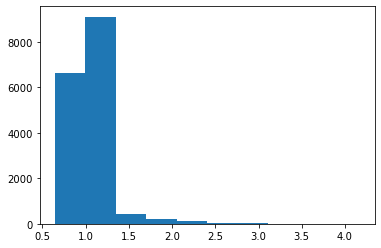

In [286]:
plt.hist(rt.Rt)

### Merge data

In [37]:
df_merged = df.merge(sdi, on=['statefips', 'date'], how='left')

In [38]:
df_merged.isnull().sum()

statefips                        0
date                             0
Stringency                       0
positiveIncrease                 0
deathIncrease                    0
hospitalizedIncrease             0
totalTestsPeopleViralIncrease    0
statename                        0
shadow_index_normalized          0
dtype: int64

In [39]:
df_merged = df_merged.merge(rt, on=['statefips', 'date'], how='left')

In [40]:
df_merged['date'] = pd.to_datetime(df_merged['date'])

In [41]:
df_merged.isnull().sum()

statefips                           0
date                                0
Stringency                          0
positiveIncrease                    0
deathIncrease                       0
hospitalizedIncrease                0
totalTestsPeopleViralIncrease       0
statename                           0
shadow_index_normalized             0
Rt                               1532
dtype: int64

In [42]:
df_merged = df_merged.dropna()
#df_merged['Rt'] = df_merged['Rt'].fillna(df_merged['Rt'].median())

In [43]:
df_merged.tail()

,statefips,date,Stringency,positiveIncrease,deathIncrease,hospitalizedIncrease,totalTestsPeopleViralIncrease,statename,shadow_index_normalized,Rt
18121,56,2021-01-22,66.67,159.0,21.0,3.0,0.0,Wyoming,38.312439,0.923943
18122,56,2021-01-23,66.67,0.0,0.0,0.0,0.0,Wyoming,41.131689,0.925517
18123,56,2021-01-24,66.67,315.0,0.0,8.0,0.0,Wyoming,40.648092,0.925426
18124,56,2021-01-25,66.67,164.0,0.0,5.0,0.0,Wyoming,41.151607,0.925535
18125,56,2021-01-26,66.67,90.0,25.0,1.0,2757.0,Wyoming,39.436469,0.928096


In [45]:
df_merged.to_csv('df_merged_analysis.csv')

### Modeling

In [436]:
df_merged.statefips.unique()

array([ 1,  2,  4,  5,  6,  8,  9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 11, 54, 55, 56])

In [437]:
state = 6  # look at CA for instance
tmp = df_merged[df_merged.statefips==6]

In [438]:
tmp.shape

(326, 10)

Text(0, 0.5, 'Rt')

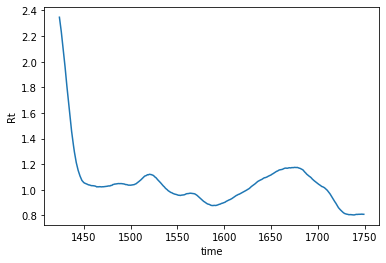

In [439]:
plt.plot(tmp.Rt)
plt.xlabel('time')
plt.ylabel('Rt')

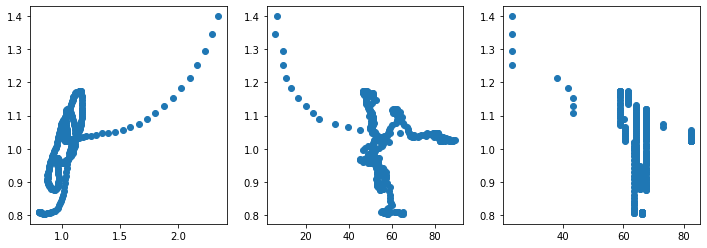

In [440]:
Lag = 14
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(tmp.Rt[:-Lag], tmp.Rt[Lag:])
plt.subplot(1,3,2)
plt.scatter(tmp.shadow_index_normalized[:-Lag], tmp.Rt[Lag:])
plt.subplot(1,3,3)
plt.scatter(tmp.Stringency[:-Lag], tmp.Rt[Lag:])

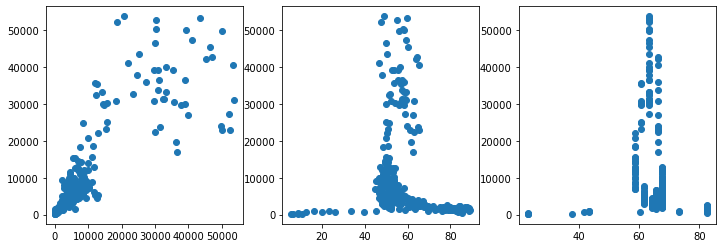

In [441]:
Lag = 14
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(tmp.positiveIncrease[:-Lag], tmp.positiveIncrease[Lag:])
plt.subplot(1,3,2)
plt.scatter(tmp.shadow_index_normalized[:-Lag], tmp.positiveIncrease[Lag:])
plt.subplot(1,3,3)
plt.scatter(tmp.Stringency[:-Lag], tmp.positiveIncrease[Lag:])

In [442]:
### Growth rate a dependent variable
longLag = 25
shortLag = 3

tmp = tmp.assign(**{'newPositiveFraction':(tmp['positiveIncrease'].rolling(shortLag).sum()/tmp['positiveIncrease'].rolling(longLag).sum()).values})
tmp.dropna(inplace=True)
tmp.shape


(302, 11)

Text(0, 0.5, 'custom growth rate')

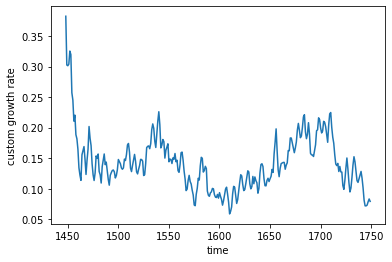

In [443]:
plt.plot(tmp['newPositiveFraction'])
plt.xlabel('time')
plt.ylabel('custom growth rate')

In [444]:
# correlations
print(pearsonr(tmp['Rt'], tmp['newPositiveFraction']))
Lag = 14
print(pearsonr(tmp['Rt'][Lag:], tmp['shadow_index_normalized'][:-Lag]))
print(pearsonr(tmp['Rt'][Lag:], tmp['Stringency'][:-Lag]))
print(pearsonr(tmp['Stringency'], tmp['shadow_index_normalized']))

print(spearmanr(tmp['Rt'], tmp['newPositiveFraction']))
print(spearmanr(tmp['Rt'][Lag:], tmp['shadow_index_normalized'][:-Lag]))
print(spearmanr(tmp['Rt'][Lag:], tmp['Stringency'][:-Lag]))
print(spearmanr(tmp['Stringency'], tmp['shadow_index_normalized']))

(0.4260482408106027, 9.52225813708788e-15)
(-0.06277263209210468, 0.2883712729582415)
(-0.07588672327859389, 0.19910977567488314)
(0.8745686545933677, 2.6115440573594878e-96)
SpearmanrResult(correlation=0.4732902433716563, pvalue=2.897303745319935e-18)
SpearmanrResult(correlation=-0.2546804231018089, pvalue=1.2107730339338288e-05)
SpearmanrResult(correlation=-0.22126501045820962, pvalue=0.0001532827929457515)
SpearmanrResult(correlation=0.639052384633963, pvalue=4.581141208951763e-36)


In [445]:
# correlations
print(pearsonr(tmp['Rt'], tmp['newPositiveFraction']))
Lag = 14
print(pearsonr(tmp['newPositiveFraction'][Lag:], tmp['shadow_index_normalized'][:-Lag]))
print(pearsonr(tmp['newPositiveFraction'][Lag:], tmp['Stringency'][:-Lag]))
print(pearsonr(tmp['Stringency'], tmp['shadow_index_normalized']))

print(spearmanr(tmp['Rt'], tmp['newPositiveFraction']))
print(spearmanr(tmp['newPositiveFraction'][Lag:], tmp['shadow_index_normalized'][:-Lag]))
print(spearmanr(tmp['newPositiveFraction'][Lag:], tmp['Stringency'][:-Lag]))
print(spearmanr(tmp['Stringency'], tmp['shadow_index_normalized']))

(0.4260482408106027, 9.52225813708788e-15)
(-0.07948765889662726, 0.17855640632219227)
(-0.1400404648758244, 0.01740874120986648)
(0.8745686545933677, 2.6115440573594878e-96)
SpearmanrResult(correlation=0.4732902433716563, pvalue=2.897303745319935e-18)
SpearmanrResult(correlation=-0.19885443416965065, pvalue=0.0006889166455252198)
SpearmanrResult(correlation=-0.1665096358055083, pvalue=0.004607322232079685)
SpearmanrResult(correlation=0.639052384633963, pvalue=4.581141208951763e-36)


In [446]:
Lag = 14
Y = tmp['newPositiveFraction'][Lag:]

X_baseline = tmp[['newPositiveFraction']][:-Lag]
Y.index = list(range(len(Y)))
X_baseline.index = list(range(len(X_baseline)))
model = sm.OLS(Y, X_baseline).fit()
predictions = model.predict(X_baseline) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                 
Dep. Variable:     newPositiveFraction   R-squared (uncentered):                   0.915
Model:                             OLS   Adj. R-squared (uncentered):              0.915
Method:                  Least Squares   F-statistic:                              3096.
Date:                 Wed, 03 Mar 2021   Prob (F-statistic):                   8.75e-156
Time:                         22:38:24   Log-Likelihood:                          507.95
No. Observations:                  288   AIC:                                     -1014.
Df Residuals:                      287   BIC:                                     -1010.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [447]:
Lag = 14
Y = tmp['newPositiveFraction'][Lag:]

X_improved = tmp[['newPositiveFraction', 'shadow_index_normalized']].iloc[:-Lag,:]
Y.index = list(range(len(Y)))
X_improved.index = list(range(len(X_improved)))
model = sm.OLS(Y, X_improved).fit()
predictions = model.predict(X_improved) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                 
Dep. Variable:     newPositiveFraction   R-squared (uncentered):                   0.928
Model:                             OLS   Adj. R-squared (uncentered):              0.928
Method:                  Least Squares   F-statistic:                              1847.
Date:                 Wed, 03 Mar 2021   Prob (F-statistic):                   2.99e-164
Time:                         22:38:32   Log-Likelihood:                          531.85
No. Observations:                  288   AIC:                                     -1060.
Df Residuals:                      286   BIC:                                     -1052.
Df Model:                            2                                                  
Covariance Type:             nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------

#### Predicting positiveIncrease 7 days ahead

<AxesSubplot:>

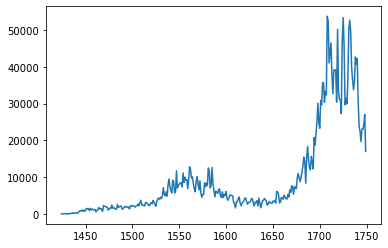

In [360]:
tmp['positiveIncrease'].plot()

In [370]:
Lag = 14
Y = tmp['positiveIncrease'][Lag:]

X_baseline = tmp['positiveIncrease'][:-Lag]
Y.index = list(range(len(Y)))
X_baseline.index = list(range(len(X_baseline)))
model = sm.OLS(Y, X_baseline).fit()
predictions = model.predict(X_baseline) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:       positiveIncrease   R-squared (uncentered):                   0.817
Model:                            OLS   Adj. R-squared (uncentered):              0.817
Method:                 Least Squares   F-statistic:                              1390.
Date:                Wed, 03 Mar 2021   Prob (F-statistic):                   9.15e-117
Time:                        20:51:24   Log-Likelihood:                         -3199.4
No. Observations:                 312   AIC:                                      6401.
Df Residuals:                     311   BIC:                                      6405.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

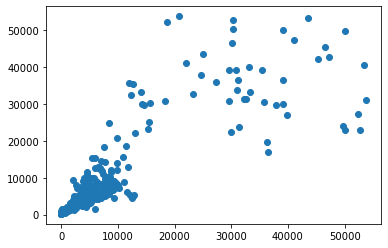

In [365]:
plt.scatter(X_baseline,Y)

In [367]:
Lag = 14
Y = tmp['positiveIncrease'][Lag:]

X_improved = tmp[['positiveIncrease', 'shadow_index_normalized']].iloc[:-Lag,:]
Y.index = list(range(len(Y)))
X_improved.index = list(range(len(X_improved)))
model = sm.OLS(Y, X_improved).fit()
predictions = model.predict(X_improved) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:       positiveIncrease   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.824
Method:                 Least Squares   F-statistic:                              731.1
Date:                Wed, 03 Mar 2021   Prob (F-statistic):                   4.41e-118
Time:                        20:49:47   Log-Likelihood:                         -3192.5
No. Observations:                 312   AIC:                                      6389.
Df Residuals:                     310   BIC:                                      6397.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

### All states together

In [52]:
from statsmodels.formula.api import ols

In [152]:
df_merged = pd.read_csv('df_merged_analysis.csv', index_col=0)

In [153]:
df_merged.head()

,statefips,date,Stringency,positiveIncrease,deathIncrease,hospitalizedIncrease,totalTestsPeopleViralIncrease,statename,shadow_index_normalized,Rt,ContainmentHealthIndex
0,1,2020-03-07,8.33,0.0,0.0,0.0,0.0,Alabama,7.647214,2.058230,14.74
1,1,2020-03-08,8.33,0.0,0.0,0.0,0.0,Alabama,6.104251,2.035865,14.74
2,1,2020-03-09,8.33,0.0,0.0,0.0,0.0,Alabama,7.227147,2.005499,14.74
3,1,2020-03-10,16.67,0.0,0.0,0.0,0.0,Alabama,6.999156,1.978277,20.51
4,1,2020-03-11,16.67,0.0,0.0,0.0,10.0,Alabama,6.644607,1.939723,20.51


In [154]:
df_merged.shape

(16624, 11)

In [147]:
'''
us_ContainmentHealthIndex = pd.read_csv('us_ContainmentHealthIndex.csv')
us_ContainmentHealthIndex.rename(columns={"RegionName":"statefips", "Date_clean":'date'}, inplace=True)
#us_ContainmentHealthIndex['date'] = pd.to_datetime(us_ContainmentHealthIndex['date'])
us_ContainmentHealthIndex['statefips'] = us_ContainmentHealthIndex['statefips'].map(lambda x: us_state_abbrev[x])
us_ContainmentHealthIndex = us_ContainmentHealthIndex[~us_ContainmentHealthIndex['statefips'].isin(['AS', 'GU', 'MP', 'PR', 'VI'])]
geomap = pd.read_csv('GeoIDs - State.csv')
geodict = {}
for i in range(len(geomap)):
    geodict[geomap.iloc[i,2]] = (geomap.iloc[i,0])
us_ContainmentHealthIndex['statefips'] = us_ContainmentHealthIndex['statefips'].map(lambda x: geodict[x])
us_ContainmentHealthIndex.head()
'''



,date,statefips,ContainmentHealthIndex
0,2020-02-01,1,6.41
1,2020-02-01,2,10.26
2,2020-02-01,4,10.26
3,2020-02-01,5,6.41
4,2020-02-01,6,8.33


In [148]:
#tmp = df_merged.merge(us_ContainmentHealthIndex, on=['statefips','date'], how='left')
#tmp.shape

(16624, 11)

In [151]:
#tmp.to_csv('df_merged_analysis.csv')

In [58]:
## Baseline autoregression
'''
Y = np.array([])
X_baseline = np.array([])
for state in df_merged.statefips.unique():
    tmp = df_merged[df_merged.statefips==state]
    longLag = 25
    shortLag = 3
    tmp = tmp.assign(**{'newPositiveFraction':(tmp['positiveIncrease'].rolling(shortLag).sum()/tmp['positiveIncrease'].rolling(longLag).sum()).values})
    tmp.dropna(inplace=True)
    Lag = 21
    Y = np.concatenate((Y,tmp['newPositiveFraction'][Lag:].values))
    X_baseline = np.concatenate((X_baseline,tmp['shadow_index_normalized'][:-Lag].values))


Y = df_merged['Rt']
X_baseline = df_merged.iloc[:,9:58]
X_baseline = sm.add_constant(X_baseline)
model = sm.OLS(Y, X_baseline).fit()
predictions = model.predict(X_baseline) 

print_model = model.summary()
print(print_model)
'''

cw_lm=ols('Rt ~ C(statename)', data=df_merged).fit()
cw_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Rt   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.498
Date:                Thu, 04 Mar 2021   Prob (F-statistic):             0.0130
Time:                        09:37:06   Log-Likelihood:                 504.73
No. Observations:               16624   AIC:                            -907.5
Df Residuals:                   16573   BIC:                            -513.8
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                1.0599      0.013     81.399      0.000       1.034       1.085
C(statename)[T.Alaska]                  -0.0134      0.018     -0.727      0.467      -0.050       0.023
C(statename)[T.Arizona]                  0.0236      0.018      1.280      0.200      -0.013       0.060
C(statename)[T.Arkansas]                 0.0032      0.018      0.173      0.862      -0.033       0.039
C(statename)[T.California]              -0.0057      0.018     -0.310      0.756      -0.042       0.030
C(statename)[T.Colorado]                -0.0153      0.018     -0.829      0.407      -0.051       0.021
C(statename)[T.Connecticut]              0.0333      0.018      1.809      0.070      -0.003       0.069
C(statename)[T.Delaware]                 0.0019      0.018      0.104      0.917      -0.034       0.038
C(statename)[T.District of Columbia]    -0.0202      0.018     -1.099      0.272      -0.056       0.016
C(statename)[T.Florida]                  0.0217      0.018      1.181      0.238      -0.014       0.058
C(statename)[T.Georgia]                 -0.0097      0.018     -0.528      0.597      -0.046       0.026
C(statename)[T.Hawaii]                   0.0082      0.018      0.445      0.656      -0.028       0.044
C(statename)[T.Idaho]                   -0.0069      0.018     -0.374      0.708      -0.043       0.029
C(statename)[T.Illinois]                -0.0103      0.018     -0.561      0.575      -0.046       0.026
C(statename)[T.Indiana]                  0.0231      0.018      1.256      0.209      -0.013       0.059
C(statename)[T.Iowa]                     0.0063      0.018      0.341      0.733      -0.030       0.042
C(statename)[T.Kansas]                   0.0202      0.018      1.098      0.272      -0.016       0.056
C(statename)[T.Kentucky]                 0.0393      0.018      2.132      0.033       0.003       0.075
C(statename)[T.Louisiana]               -0.0088      0.018     -0.477      0.633      -0.045       0.027
C(statename)[T.Maine]                   -0.0136      0.018     -0.736      0.461      -0.050       0.023
C(statename)[T.Maryland]                 0.0053      0.018      0.289      0.772      -0.031       0.041
C(statename)[T.Massachusetts]           -0.0019      0.018     -0.104      0.917      -0.038       0.034
C(statename)[T.Michigan]                -0.0491      0.018     -2.669      0.008      -0.085      -0.013
C(statename)[T.Minnesota]               -0.0075      0.018     -0.406      0.685      -0.044       0.029
C(statename)[T.Mississippi]             -0.0112      0.018     -0.611      0.541      -0.047       0.025
C(statename)[T.Missouri]                 0.0212      0.018      1.153      0.249      -0.015       0.057
C(statename)[T.Montana]               

In [155]:
dat = pd.DataFrame([], columns=['statename', 'ContainmentHealthIndex', 'shadow_index_normalized', 'Rt'])
for state in df_merged.statename.unique():
    tmp = df_merged[df_merged.statename==state]
    '''
    longLag = 25
    shortLag = 3
    tmp = tmp.assign(**{'newPositiveFraction':(tmp['positiveIncrease'].rolling(shortLag).sum()/tmp['positiveIncrease'].rolling(longLag).sum()).values})
    tmp.dropna(inplace=True)
    '''
    Lag = 7
    Y = tmp['Rt'][Lag:]
    X_baseline = tmp[['statename', 'ContainmentHealthIndex', 'shadow_index_normalized']].iloc[:-Lag,:]
    X_baseline['Rt'] = Y.values
    
    dat = pd.concat([dat,X_baseline])


In [156]:
dat.shape

(16267, 4)

In [159]:
cw_lm=ols('Rt ~ C(statename)+ContainmentHealthIndex+shadow_index_normalized', data=dat).fit()  #+Stringency+shadow_index_normalized
print(cw_lm.summary())
print(sm.stats.anova_lm(cw_lm, typ=2))

                            OLS Regression Results                            
Dep. Variable:                     Rt   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     213.3
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:38:29   Log-Likelihood:                 10872.
No. Observations:               16265   AIC:                        -2.164e+04
Df Residuals:                   16212   BIC:                        -2.123e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [160]:
## Maximal strigency and optimal stringency
nbins = 10
SDI_bins = np.linspace(dat.shadow_index_normalized.min(), dat.shadow_index_normalized.max(),nbins+1)
SDI_bincenters = SDI_bins[:-1] + (SDI_bins[1]-SDI_bins[0])/2
optimal_stringency = np.zeros(nbins)
maximal_stringency = np.zeros(nbins)
minimal_stringency = np.zeros(nbins)

for i in range(nbins):
    tmp = dat.loc[(dat.shadow_index_normalized >= SDI_bins[i]) & (dat.shadow_index_normalized < SDI_bins[i+1])]
    lowestRt = tmp['Rt'].min()
    maximal_stringency[i] = tmp['ContainmentHealthIndex'].max()
    minimal_stringency[i] = tmp['ContainmentHealthIndex'].min()
    optimal_stringency[i] = tmp.loc[tmp['Rt']==lowestRt]['ContainmentHealthIndex']

Text(0, 0.5, 'ContainmentHealthIndex')

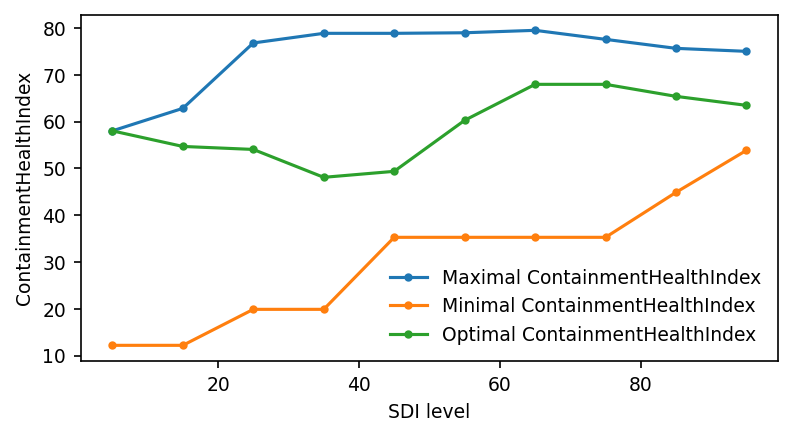

In [162]:
plt.figure(figsize=(6,3))
plt.plot(SDI_bincenters, maximal_stringency, '.-', label='Maximal ContainmentHealthIndex')
plt.plot(SDI_bincenters, minimal_stringency, '.-', label='Minimal ContainmentHealthIndex')
plt.plot(SDI_bincenters, optimal_stringency, '.-', label='Optimal ContainmentHealthIndex')
plt.legend(frameon=False)
plt.xlabel('SDI level')
plt.ylabel('ContainmentHealthIndex')

In [111]:
dat.head()

,statename,Stringency,shadow_index_normalized,Rt
0,Alabama,8.33,7.647214,1.894263
1,Alabama,8.33,6.104251,1.849735
2,Alabama,8.33,7.227147,1.794589
3,Alabama,16.67,6.999156,1.737746
4,Alabama,16.67,6.644607,1.679838


## National data

In [468]:
df_national = pd.read_csv('national-history.csv')
df_national = df_national.dropna()
df_national['date'] = pd.to_datetime(df_national['date'])
df_national = df_national.sort_values(by='date')
df_national.index = list(range(len(df_national)))
df_national = df_national[df_national.date <= '2020-12-21']  # to match stringency data
df_national

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
0,2020-04-01,5336.0,1004,256.0,3937.0,4134,20906.0,27930.0,1028082.0,86693,32.0,561.0,223165.0,26233,7084.0,56,1302177,118204
1,2020-04-02,6514.0,1178,305.0,4513.0,4198,22997.0,32128.0,1127354.0,99272,32.0,574.0,251272.0,28107,8586.0,56,1431542,129365
2,2020-04-03,7799.0,1285,335.0,4928.0,4603,25777.0,36731.0,1231890.0,104536,39.0,623.0,283145.0,31873,10861.0,56,1572257,140715
3,2020-04-04,9280.0,1481,403.0,5500.0,5012,30268.0,41743.0,1428863.0,196973,39.0,656.0,316230.0,33085,12844.0,56,1804491,232234
4,2020-04-05,10619.0,1339,609.0,5811.0,3937,32180.0,45680.0,1521226.0,92363,39.0,652.0,342109.0,25879,14589.0,56,1924137,119646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,2020-12-17,302261.0,3438,34485.0,21910.0,5133,114459.0,632907.0,176612654.0,1257813,3504.0,7847.0,17011818.0,240156,6681651.0,56,226403201,1873340
261,2020-12-18,305127.0,2866,34716.0,21745.0,5240,113955.0,638147.0,178149619.0,1536965,3519.0,7786.0,17251064.0,239246,6762700.0,56,228600886,2197685
262,2020-12-19,307850.0,2723,34949.0,21688.0,3337,113929.0,641484.0,179336829.0,1187210,3529.0,7790.0,17453876.0,202812,6882996.0,56,230340472,1739586
263,2020-12-20,309483.0,1633,35030.0,21763.0,2382,113601.0,643866.0,180557416.0,1220587,3530.0,7695.0,17649893.0,196017,6935156.0,56,232122652,1782180


<AxesSubplot:>

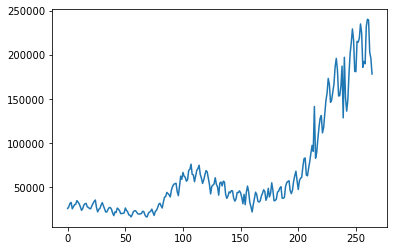

In [469]:
df_national.positiveIncrease.plot()

In [471]:
df_owid = pd.read_csv('owid-covid-data.csv')
df_owid = df_owid[df_owid.iso_code=='USA']
df_owid = df_owid[['date', 'stringency_index']]
df_owid = df_owid[df_owid.date >= '2020-04-01']  # to match national data
df_owid = df_owid.dropna()
df_owid

,date,stringency_index
55087,2020-04-01,72.69
55088,2020-04-02,72.69
55089,2020-04-03,72.69
55090,2020-04-04,72.69
55091,2020-04-05,72.69
...,...,...
55347,2020-12-17,71.76
55348,2020-12-18,71.76
55349,2020-12-19,71.76
55350,2020-12-20,71.76


<AxesSubplot:>

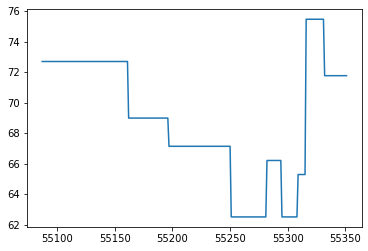

In [473]:
df_owid.stringency_index.plot()

In [475]:
Lag = 14
print(pearsonr(df_owid.stringency_index[:-Lag], df_national.positiveIncrease[Lag:]))
print(spearmanr(df_owid.stringency_index[:-Lag], df_national.positiveIncrease[Lag:]))

(-0.03457747582439616, 0.5855892131589904)
SpearmanrResult(correlation=-0.3772967559902477, pvalue=6.51300811862914e-10)


## Optimal stringency

In [19]:
df_merged

,statefips,date,Stringency,positiveIncrease,deathIncrease,hospitalizedIncrease,totalTestsPeopleViralIncrease,statename,shadow_index_normalized,Rt
0,1,2020-03-07,8.33,0.0,0.0,0.0,0.0,Alabama,7.647214,2.058230
1,1,2020-03-08,8.33,0.0,0.0,0.0,0.0,Alabama,6.104251,2.035865
2,1,2020-03-09,8.33,0.0,0.0,0.0,0.0,Alabama,7.227147,2.005499
3,1,2020-03-10,16.67,0.0,0.0,0.0,0.0,Alabama,6.999156,1.978277
4,1,2020-03-11,16.67,0.0,0.0,0.0,10.0,Alabama,6.644607,1.939723
...,...,...,...,...,...,...,...,...,...,...
18121,56,2021-01-22,66.67,159.0,21.0,3.0,0.0,Wyoming,38.312439,0.923943
18122,56,2021-01-23,66.67,0.0,0.0,0.0,0.0,Wyoming,41.131689,0.925517
18123,56,2021-01-24,66.67,315.0,0.0,8.0,0.0,Wyoming,40.648092,0.925426
18124,56,2021-01-25,66.67,164.0,0.0,5.0,0.0,Wyoming,41.151607,0.925535


In [26]:
SDI_bins = np.linspace(df_merged.shadow_index_normalized.min(), df_merged.shadow_index_normalized.max(),20)

In [29]:
optimal_stringency = np.zeros_like(SDI_bins)

In [252]:
### Growth rate a dependent variable
longLag = 25
shortLag = 7
tmp = df_merged.groupby('statefips')['positiveIncrease'].rolling(longLag).sum()
df_merged['rollinglongLagDayPosLag1'] = tmp.droplevel(level=0)

tmp = df_merged.groupby('statefips')['positiveIncrease'].rolling(shortLag).sum()
df_merged['rollingshortLagDayPos'] = tmp.droplevel(level=0)

df_merged['newPositiveFraction'] = df_merged['rollingshortLagDayPos'] / df_merged['rollinglongLagDayPosLag1']